<a href="https://colab.research.google.com/github/RaneemQaddoura/EvoNP/blob/master/examples/example0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Evolutionary Algorithm with Nearest Point (EvoNP)</h1>
An efficient evolutionary algorithm with a nearest neighbor search technique for clustering analysis

EvoNP is a clustering algorithm which aims at grouping similar data points to the same cluster and dissimilar data points to different clusters. It is based on the evolution behavior of genetic algorithm and the Nearest Neighbor Search (NNS) technique.

<h2>Installation</h2>

Python 3.xx is required

<h2>GitHub</h2>

Clone the Git repository from GitHub:
git clone https://github.com/RaneemQaddoura/EvoNP.git

In [ ]:
!git clone https://github.com/RaneemQaddoura/EvoNP.git

In [ ]:
# Change working directory
import os
os.chdir("EvoNP/")

In [ ]:
#Install NumPy, SciPy, sklearn, pandas, treelib, and matplotlib
!pip install -r requirements.txt

In [ ]:
os.chdir("src")

In [ ]:
import EvoNP
from sklearn import metrics
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [ ]:
format = '%m/%d/%y %H:%M:%S'

#initializing variables
directory = "../datasets/" # the directory where the dataset is stored
nChromosomes = 20 
nGenerations = 50 
crossoverProbability = 0.8
mutationProbability = 0.001

filename = "aggregation.csv"

In [ ]:
# Read the dataset file and generate the points list and true values
data = np.genfromtxt(directory + filename, delimiter=',')

nPoints, nValues = data.shape #Number of points and Number of values for each point
nValues = nValues - 1 #Dimension value
k = len(np.unique(data[:,-1]))#k: Number of clusters
points = data[:,:-1] #list of points
labelsTrue = data[:,-1] #List of actual cluster of each points (last field)
     
popSize = (nChromosomes,k) # The population will have nChromosomes chromosome where each chromosome has chromosomeLength genes.


In [ ]:
bestChromosomeInAllGenerations, bestLabelsPredInAllGenerations, bestFitnessInAllGenerations, allBestFitness = EvoNP.run(points, nPoints, k, nChromosomes, nGenerations, crossoverProbability, mutationProbability)

In [ ]:
print("HS: " + str(float("%0.2f"%metrics.homogeneity_score(labelsTrue,bestLabelsPredInAllGenerations[bestChromosomeInAllGenerations]))))
print("CS: " + str(float("%0.2f"%metrics.completeness_score(labelsTrue,bestLabelsPredInAllGenerations[bestChromosomeInAllGenerations]))))
print("VM: " + str(float("%0.2f"%metrics.v_measure_score(labelsTrue,bestLabelsPredInAllGenerations[bestChromosomeInAllGenerations]))))
print("AMI: " + str(float("%0.2f"%metrics.adjusted_mutual_info_score(labelsTrue,bestLabelsPredInAllGenerations[bestChromosomeInAllGenerations]))))
print("ARI: " + str(float("%0.2f"%metrics.adjusted_rand_score(labelsTrue,bestLabelsPredInAllGenerations[bestChromosomeInAllGenerations]))))
  

HS: 0.85
CS: 0.81
VM: 0.83
AMI: 0.83
ARI: 0.66


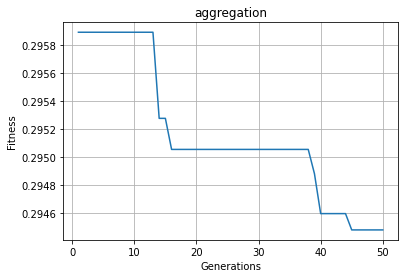

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot fitness progression
allGenerations = [x+1 for x in range(nGenerations)]
plt.plot(allGenerations, allBestFitness)
plt.title(filename[:-4])
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.grid()
plt.show()
plt.clf()

<h2>Citing EvoNP</h2>
Qaddoura, R., Faris, H. & Aljarah, I. An efficient evolutionary algorithm with a nearest neighbor search technique for clustering analysis. J Ambient Intell Human Comput (2020). https://doi.org/10.1007/s12652-020-02570-2